<a href="https://colab.research.google.com/github/eljanabdullazada/sdp_cv/blob/nizami/Text_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 16.8 MB/s eta 0:00:00


Saving download.jpg to download (1).jpg
Saving img.png to img (1).png
Saving img_1.png to img_1 (1).png
Saving img_2.png to img_2 (1).png
Saving img_3.png to img_3 (1).png


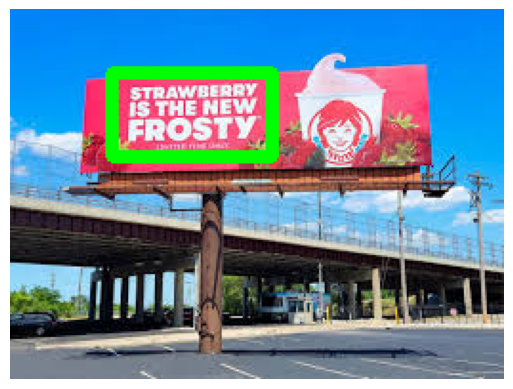

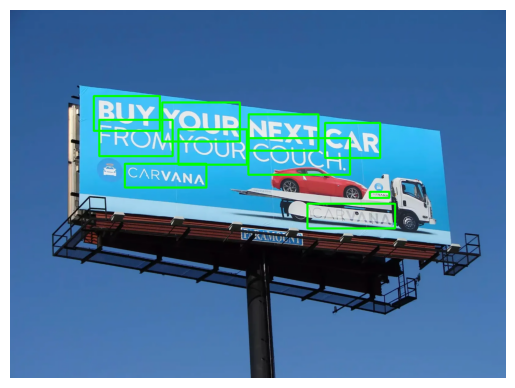

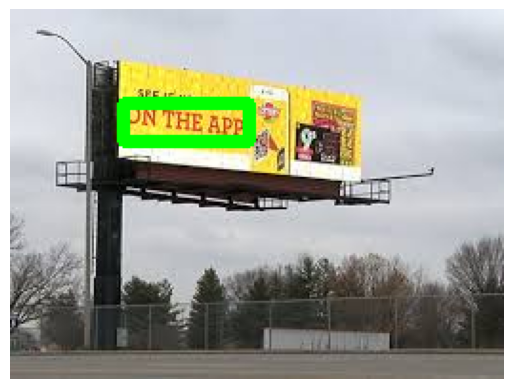

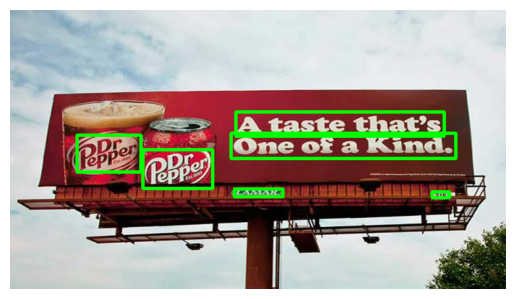

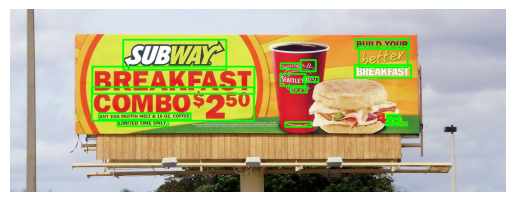

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt
from google.colab import files
import io
import numpy as np

# Upload images
uploaded = files.upload()  # This will prompt you to upload files from your local machine

# Function to read an uploaded image
def read_image(image_name):
    # Check if the key exists in uploaded, otherwise print available keys
    if image_name in uploaded:
        image_bytes = uploaded[image_name]  # Get the image from the uploaded dictionary
    else:
        print(f"Error: Image '{image_name}' not found in uploaded files.")
        print(f"Available files: {list(uploaded.keys())}")
        return None  # Return None to indicate failure

    img_array = np.frombuffer(image_bytes, np.uint8)  # Convert bytes to numpy array
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)  # Decode the image as color
    return img

# Adjust filenames to match the uploaded files
uploaded_filenames = list(uploaded.keys())
img1 = read_image(uploaded_filenames[0]) if len(uploaded_filenames) > 0 else None
img2 = read_image(uploaded_filenames[1]) if len(uploaded_filenames) > 1 else None
img3 = read_image(uploaded_filenames[2]) if len(uploaded_filenames) > 2 else None
img4 = read_image(uploaded_filenames[3]) if len(uploaded_filenames) > 3 else None
img5 = read_image(uploaded_filenames[4]) if len(uploaded_filenames) > 4 else None

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'], gpu=False)

# Proceed with the rest of your code only if images were loaded successfully
if img1 is not None and img2 is not None and img3 is not None and img4 is not None and img5 is not None:
    # Use EasyOCR to extract text from the images
    text1 = reader.readtext(img1)
    text2 = reader.readtext(img2)
    text3 = reader.readtext(img3)
    text4 = reader.readtext(img4)
    text5 = reader.readtext(img5)

    # Function to display the image with text bounding boxes
    def display_image_with_bboxes(image, text):
        for t in text:
            bbox, text_content, score = t
            # Ensure bounding box coordinates are valid
            if len(bbox) == 4:
                # Convert bounding box coordinates to integers
                cv2.rectangle(image, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0, 255, 0), 5)  # Draw bounding box

        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    # Display images with detected text
    display_image_with_bboxes(img1, text1)
    display_image_with_bboxes(img2, text2)
    display_image_with_bboxes(img3, text3)
    display_image_with_bboxes(img4, text4)
    display_image_with_bboxes(img5, text5)
else:
    print("Error: Could not load all images. Please check filenames and re-upload.")
